In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

# Load the dataset from a CSV file
data = pd.read_csv('/Users/vamsi/Downloads/buy3/Final_Price_Prediction.csv')
model_save_path = '/Users/vamsi/Downloads/buy3/classifier.hdf5'
tflite_save_path = '/Users/vamsi/Downloads/buy3/classifier.tflite'

# Extract the features and target variable
features = data.drop(['SalePrice','Costpersquareft'], axis=1)
target = data['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features to a specific range (e.g., 0 to 1)
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Build a neural network model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),

    keras.layers.Dense(32, activation='relu'),

    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=200)

# Evaluate the model on the testing set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions on new data
new_data = pd.DataFrame({
    'AreaCode': [1],
    'Bedroom': [6],
    'Bath': [2],
    'TotalRooms': [5],
    'YrSold': [2008],
    'TotalArea': [6338],
})

model.save(model_save_path)
predicted_prices = model.predict(new_data)
print(f"Predicted Prices: {predicted_prices}")


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Epoch 1/200
37/37 [==============================] - 0s 3ms/step - loss: 264358.8750 - val_loss: 113579.3281
Epoch 2/200
37/37 [==============================] - 0s 1ms/step - loss: 120236.1094 - val_loss: 90699.9219
Epoch 3/200
37/37 [==============================] - 0s 914us/step - loss: 107205.4297 - val_loss: 85555.2422
Epoch 4/200
37/37 [==============================] - 0s 1ms/step - loss: 103924.0859 - val_loss: 85166.3750
Epoch 5/200
37/37 [==============================] - 0s 1ms/step - loss: 102587.5000 - val_lo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


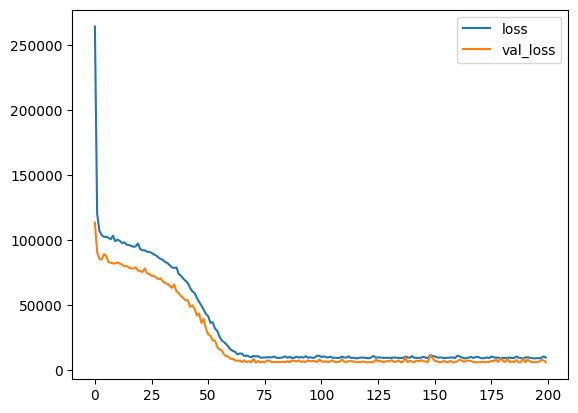

In [2]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()